# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding


From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In the context of data analysis, our mission involves exploring the dataset to find the critical factors responsible for shaping the prices of used cars. Adhering to the CRISP-DM methodology, our data-focused challenge revolves around employing specialized techniques to recognize the pivotal characteristics that drive variations in used car prices. Our ultimate objective is to construct a predictive model capable of estimating used car prices by leveraging these influential attributes.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

####  Understanding and analyzing a dataset involves several key steps

1. Loading the dataset
2. Using the info() and describe() functions to understand the columns and describe the summary statisics
3. Understanding the shape of the dataset using the shape method
4. Understand the Null/NaN 
5. Finding the columns with null values and the count of nulls values in the column
6. Checking for any quotes, commas or problematic data , more conditions can be added if needed

In [2]:
# 1. Load dataset
data = pd.read_csv('data/vehicles.csv')
# 2. Display column names and data types using the info()
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# 2.  Display summary statistics
print(data.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


#### Finding the null and unique percentage of values in the dataset and looking for special characters if any to tackle

######################################
Number of records: 426879
Number of Columns: 18

Unique Values Count and Percentage:
              Unique Values Count  Unique Values Percentage
id                         426880                100.000000
region                        404                  0.094640
price                       15655                  3.667307
year                          114                  0.026705
manufacturer                   42                  0.009839
model                       29649                  6.945512
condition                       6                  0.001406
cylinders                       8                  0.001874
fuel                            5                  0.001171
odometer                   104870                 24.566623
title_status                    6                  0.001406
transmission                    3                  0.000703
VIN                        118246                 27.700056
drive                           3   

<Figure size 1500x1000 with 0 Axes>

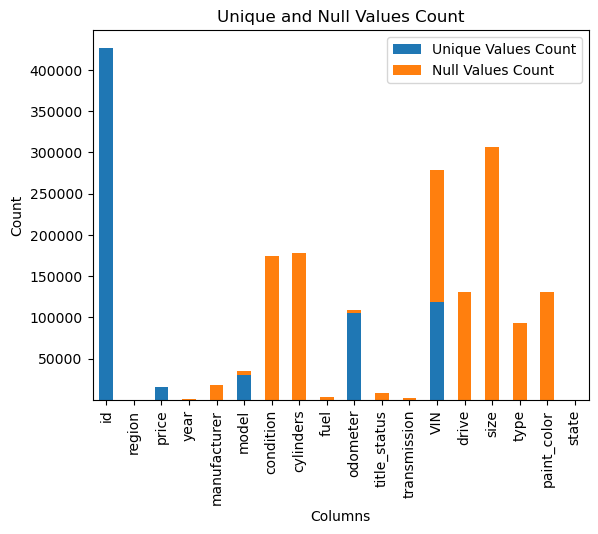

Quote issue in column 'region'
Quote issue in column 'model'
Quote issue in column 'VIN'
########################################
Columns with Quote/other issues
['region', 'model', 'VIN']


In [4]:
print("######################################")
# Checking for the number of records in the dataset
num_records = data.shape[0] - 1  # Subtract 1 to exclude the header

print("Number of records:", num_records)
print("Number of Columns:", data.shape[1])
print()


# Get counts of unique values and null values
unique_counts = data.nunique()
null_counts = data.isnull().sum()

# Calculate percentages
total_rows = len(data)
unique_percentages = (unique_counts / total_rows) * 100
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to store the results
results_data = pd.DataFrame({
    'Unique Values Count': unique_counts,
    'Unique Values Percentage': unique_percentages,
    'Null Values Count': null_counts,
    'Null Values Percentage': null_percentages,
})

# Print the results
print("Unique Values Count and Percentage:")
print(results_data[['Unique Values Count', 'Unique Values Percentage']])
print("\nNull Values Count and Percentage:")
print(results_data[['Null Values Count', 'Null Values Percentage']])

print(results_data[['Unique Values Count', 'Null Values Count']])

# Set a custom figure size for the chart
plt.figure(figsize=(15, 10))

# Plot the results with stacking
results_data[['Unique Values Count', 'Null Values Count']].plot(kind='bar', stacked=True)
plt.title("Unique and Null Values Count")
plt.xlabel("Columns")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.show()

# Check for issues in for any quotes data
quote_columns=[]
for column in data.columns:
    for index, value in data[column].items():
        if isinstance(value, str) and ("'" in value or '"' in value or "," in value or "." in value):
            print(f"Quote issue in column '{column}'")
            quote_columns.append(column)
            break
            
print("########################################")
print("Columns with Quote/other issues")
print(quote_columns)
                  
        # Add additional checks for other issues if needed

#### Observation
Unique values of Condition. cylinders, fuel, title_status, transmission, drive, size, type, paint_color and state are mvery low in number , less than 50 thats why unique value counts are not visible in the graph

### Data Visualizations

1. Number of cars sold based on the year
2. Understanding the features size, manufeacturer, paint_color, condition and other images  


Text(0.5, 1.0, 'Year Value Counts')

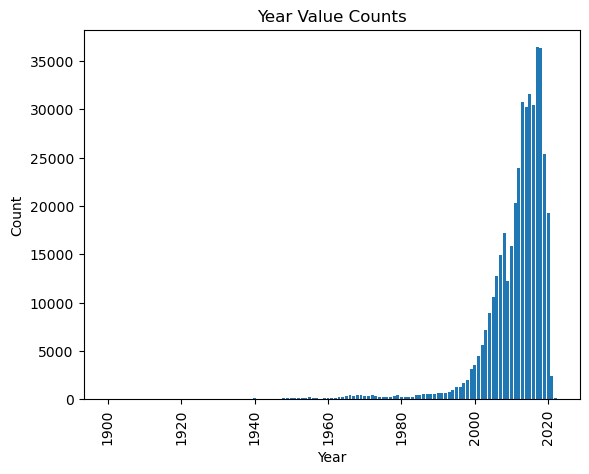

In [5]:
rg = data['year'].value_counts()
plt.bar(rg.index, rg.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Year Value Counts')

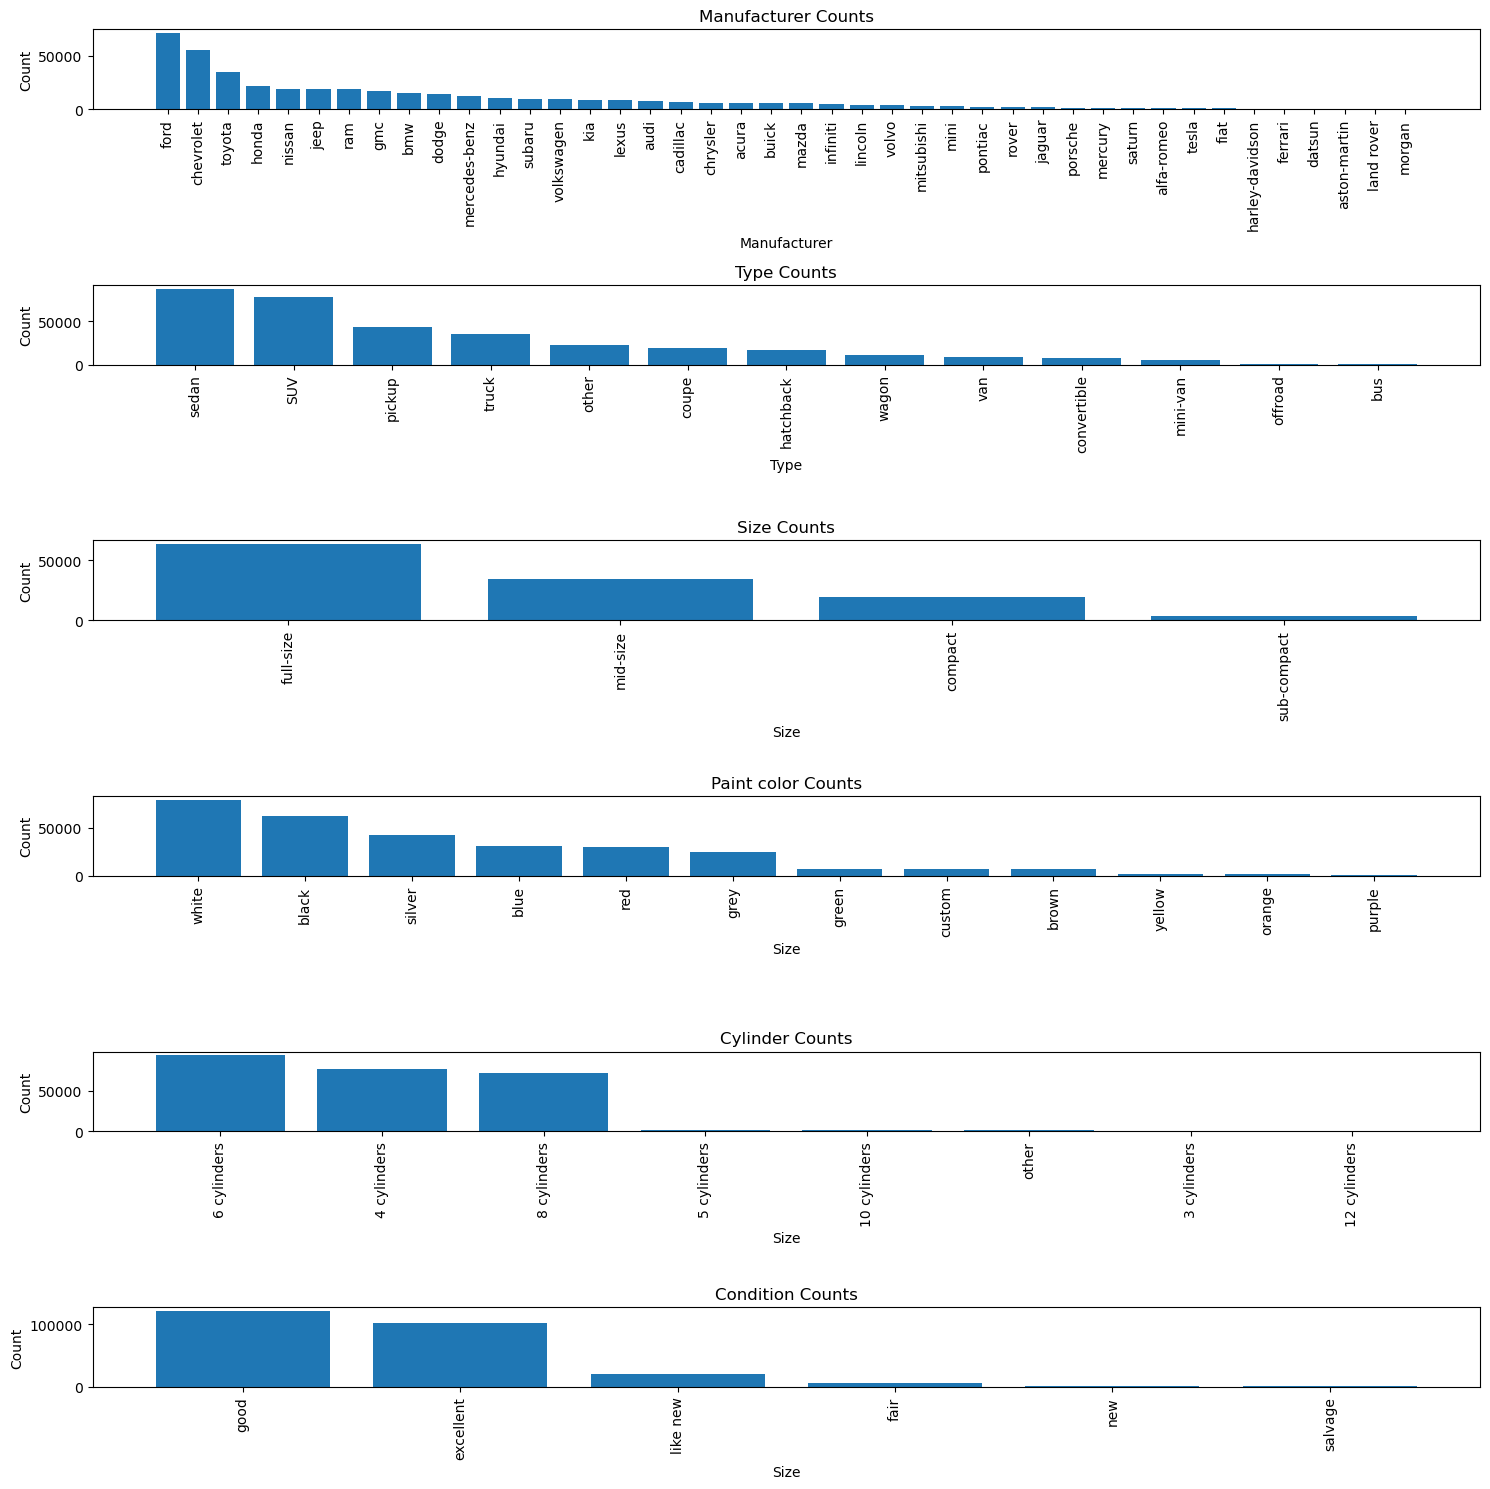

In [6]:

# Create subplots with two rows and one column
fig, axs = plt.subplots(6, 1, figsize=(15, 15))

# Plot Manufacturer Counts
manufacturer_counts = data['manufacturer'].value_counts()
axs[0].bar(manufacturer_counts.index, manufacturer_counts.values)
axs[0].set_title("Manufacturer Counts")
axs[0].set_xlabel("Manufacturer")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=90)

# Plot Type Counts
type_counts = data['type'].value_counts()
axs[1].bar(type_counts.index, type_counts.values)
axs[1].set_title("Type Counts")
axs[1].set_xlabel("Type")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=90)

# Plot Size Counts
type_counts = data['size'].value_counts()
axs[2].bar(type_counts.index, type_counts.values)
axs[2].set_title("Size Counts")
axs[2].set_xlabel("Size")
axs[2].set_ylabel("Count")
axs[2].tick_params(axis='x', rotation=90)

# Plot paint_color Counts
type_counts = data['paint_color'].value_counts()
axs[3].bar(type_counts.index, type_counts.values)
axs[3].set_title("Paint color Counts")
axs[3].set_xlabel("Size")
axs[3].set_ylabel("Count")
axs[3].tick_params(axis='x', rotation=90)

# Plot cylinders Counts
type_counts = data['cylinders'].value_counts()
axs[4].bar(type_counts.index, type_counts.values)
axs[4].set_title("Cylinder Counts")
axs[4].set_xlabel("Size")
axs[4].set_ylabel("Count")
axs[4].tick_params(axis='x', rotation=90)

# Plot condition Counts
type_counts = data['condition'].value_counts()
axs[5].bar(type_counts.index, type_counts.values)
axs[5].set_title("Condition Counts")
axs[5].set_xlabel("Size")
axs[5].set_ylabel("Count")
axs[5].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


### Finding the outliers of the int columns Year, Price and Odometer

Price Q1  5900.0
Price Q3  26485.75
price outliers count :  8177


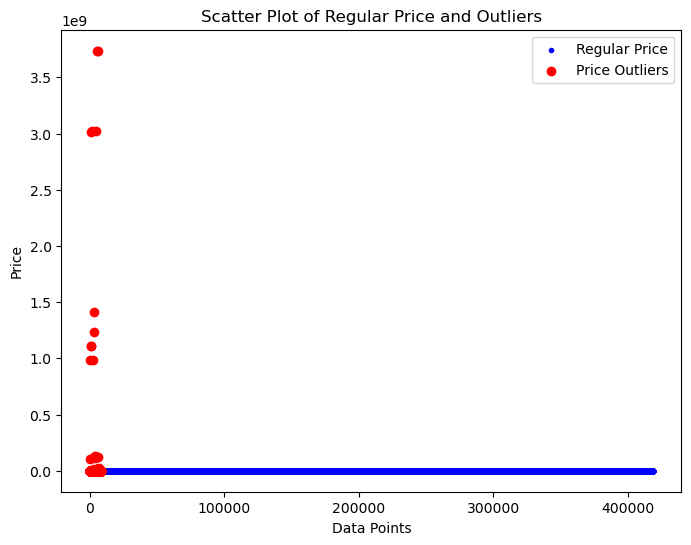

Odometer Q1  37704.0
Odometer Q3  133542.5
odometer outliers count :  4385


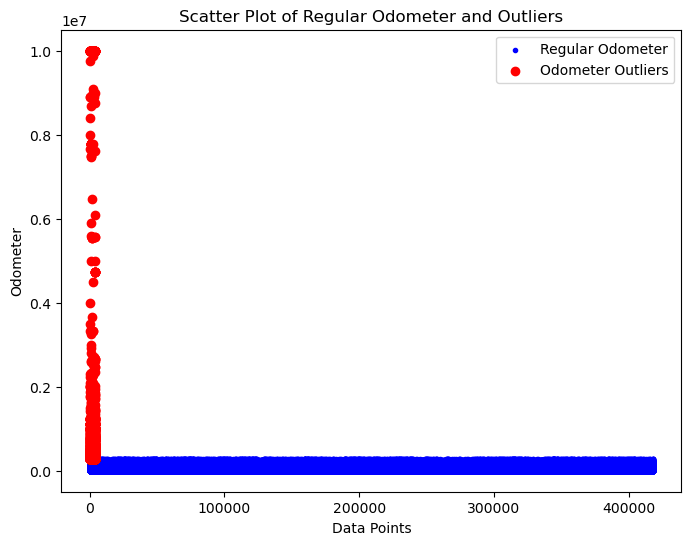

Year Q1  2008.0
Year Q3  2017.0
Year outliers count:  15896


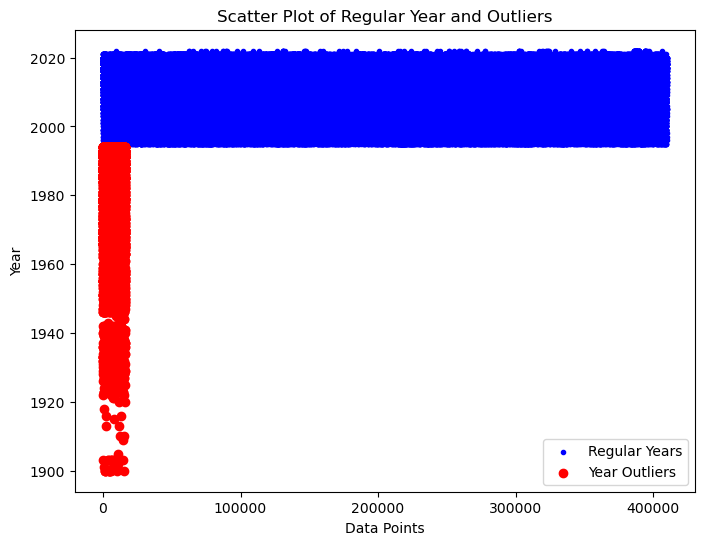

In [8]:
# Finding the outliers in the price and odometer

# Calculate Q1 and Q3
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75) 

print('Price Q1 ', Q1)
print('Price Q3 ', Q3)

# Calculate interquartile range 
IQR = Q3 - Q1  

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Filter rows based on IQR
filter = (data['price'] < lower_limit) | (data['price'] > upper_limit)
price_outliers = data.loc[filter]
filtered_data = data[(data['price'] >= lower_limit) & (data['price'] <= upper_limit)]
print('price outliers count : ' , len(price_outliers))

# Create a scatter plot to visualize the price outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(filtered_data)), filtered_data['price'], c='blue', marker='.', label='Regular Price')
plt.scatter(range(len(price_outliers)), price_outliers['price'], c='red', marker='o', label='Price Outliers')
plt.title("Scatter Plot of Regular Price and Outliers")
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.legend()
plt.show()

## Odometer calculation of outliers

# Calculate Q1 and Q3
Q1 = data['odometer'].quantile(0.25)
Q3 = data['odometer'].quantile(0.75) 

print('Odometer Q1 ', Q1)
print('Odometer Q3 ', Q3)

# Calculate interquartile range 
IQR = Q3 - Q1  

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Filter rows based on IQR
filter = (data['odometer'] < lower_limit) | (data['odometer'] > upper_limit)
odo_outliers = data.loc[filter]
filtered_odometer_data = data[(data['odometer'] >= lower_limit) & (data['odometer'] <= upper_limit)]
print('odometer outliers count : ' , len(odo_outliers))

# Create a scatter plot to visualize the price outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(filtered_odometer_data)), filtered_odometer_data['odometer'], c='blue', marker='.', label='Regular Odometer')
plt.scatter(range(len(odo_outliers)), odo_outliers['odometer'], c='red', marker='o', label='Odometer Outliers')
plt.title("Scatter Plot of Regular Odometer and Outliers")
plt.xlabel("Data Points")
plt.ylabel("Odometer")
plt.legend()
plt.show()


# Calculate Q1 and Q3
Q1 = data['year'].quantile(0.25)
Q3 = data['year'].quantile(0.75) 

print('Year Q1 ', Q1)
print('Year Q3 ', Q3)

# Calculate interquartile range 
IQR = Q3 - Q1  

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Filter rows based on IQR
filter = (data['year'] < lower_limit) | (data['year'] > upper_limit)
year_outliers = data.loc[filter]

print('Year outliers count: ', len(year_outliers))
filtered_year_data = data[(data['year'] >= lower_limit) & (data['year'] <= upper_limit)]

# Create a scatter plot to visualize the year outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(filtered_year_data)), filtered_year_data['year'], c='blue', marker='.', label='Regular Years')
plt.scatter(range(len(year_outliers)), year_outliers['year'], c='red', marker='o', label='Year Outliers')
plt.title("Scatter Plot of Regular Year and Outliers")
plt.xlabel("Data Points")
plt.ylabel("Year")
plt.legend()
plt.show()

## Data Prepartaion


### Data Cleaning

- Dropping the rows where requied columns like Price, Odometer are NaN
- Dropping the duplicate data
- Remove the outliers for Price, Odometer
- Handle missing data with NA for all the object columns
- Encode categorical variables.
- Normalize or scale features.
- Create additional features if needed.


In [9]:
# Create a copy of the DataFrame
data_copy = data.copy()

In [10]:
## Dropping the rows with Price and Odometer as NaN

print("######################################################")
print("Shape of the dataset before any cleaning... " , data_copy.shape)
data_copy = data_copy.dropna(subset=['year', 'odometer', 'price'])
print("Shape of the dataset after deleting the rows with null year , odometer and price... " , data_copy.shape)

######################################################
Shape of the dataset before any cleaning...  (426880, 18)
Shape of the dataset after deleting the rows with null year , odometer and price...  (421344, 18)


In [11]:
# Drop duplicates based on the 'VIN', 'price', and 'odometer' columns
data_copy = data_copy.drop_duplicates(subset=['VIN', 'price', 'odometer'])
print('Check the size of dataframe after dropping the duplicate rows:',data_copy.shape)

Check the size of dataframe after dropping the duplicate rows: (209117, 18)


In [12]:
# Filter the DataFrame to remove outliers of price and odometer
# Calculate Q1 and Q3 for price and odometer
Q1_price = data_copy['price'].quantile(0.25)
Q3_price = data_copy['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_odometer = data_copy['odometer'].quantile(0.25)
Q3_odometer = data_copy['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# Define upper and lower limits for outliers
upper_limit_price = Q3_price + 1.5 * IQR_price
lower_limit_price = Q1_price - 1.5 * IQR_price

upper_limit_odometer = Q3_odometer + 1.5 * IQR_odometer
lower_limit_odometer = Q1_odometer - 1.5 * IQR_odometer

# Create boolean masks for outliers
price_outliers_mask = (data_copy['price'] < lower_limit_price) | (data_copy['price'] > upper_limit_price)
odometer_outliers_mask = (data_copy['odometer'] < lower_limit_odometer) | (data_copy['odometer'] > upper_limit_odometer)

# Filter the data_copyFrame to remove outliers
data_copy = data_copy[~(price_outliers_mask | odometer_outliers_mask)]

print('Check the size of dataframe after removing the outliers rows:',data_copy.shape)

Check the size of dataframe after removing the outliers rows: (197386, 18)


### Showing the difference in datasets with and without outliers

C:\Users\pjaini\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


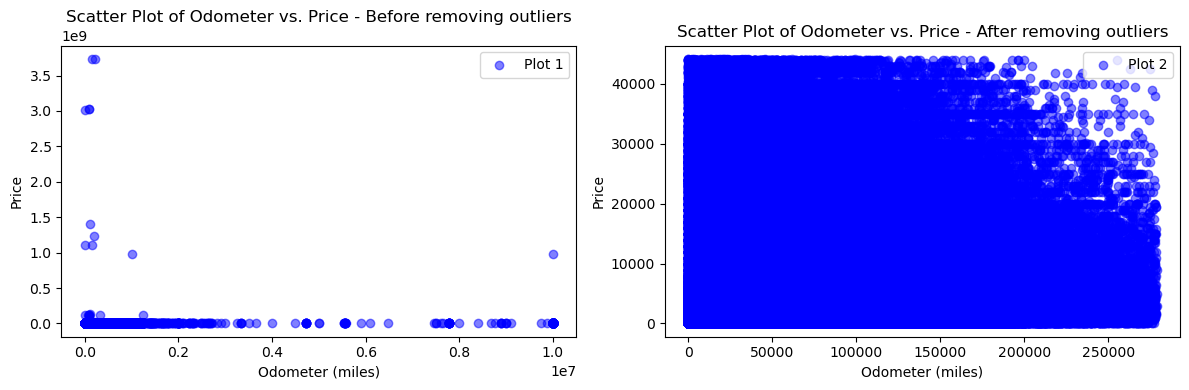

In [13]:

# Create subplots with two columns (2 plots side by side)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figsize as needed

# Scatter plot 1 in the first subplot (axs[0])
axs[0].scatter(data['odometer'], data['price'], c='b', label='Plot 1', alpha=0.5)
axs[0].set_title('Scatter Plot of Odometer vs. Price - Before removing outliers')
axs[0].set_xlabel('Odometer (miles)')
axs[0].set_ylabel('Price')
axs[0].legend()

# Scatter plot 2 in the second subplot (axs[1])
axs[1].scatter(data_copy['odometer'], data_copy['price'], c='b', label='Plot 2', alpha=0.5)
axs[1].set_title('Scatter Plot of Odometer vs. Price - After removing outliers')
axs[1].set_xlabel('Odometer (miles)')
axs[1].set_ylabel('Price')
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


### Understanding how data is distributed using the KMeans

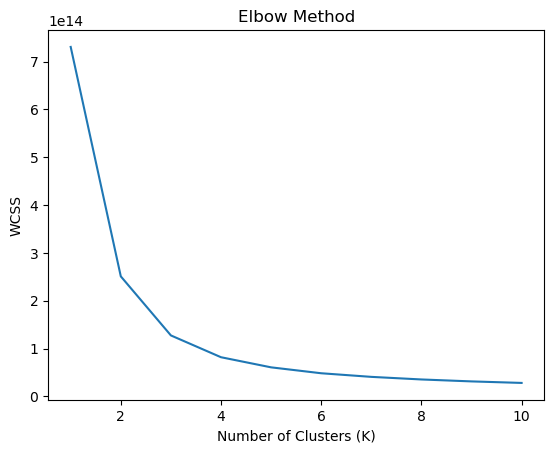

In [14]:
# Try a range of K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_copy[['price', 'year', 'odometer']])
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


### Filling categorical values which are NaN to NA

In [15]:
categorical_columns = data_copy.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

# Fill all missing categorical columns with value 'other'
for categorical in categorical_columns:
    data_copy[categorical].fillna("na",inplace=True)
    
print(data_copy.isnull().sum())
print("No NaN columns any more")

['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64
No NaN columns any more


### Dropping the id, VIN and the region

In [16]:
columns_to_drop = ['id','region','VIN']
#data_copy.drop(columns=columns_to_drop, inplace=True)
print('Check the size of dataframe after removing the columns id, VIN and the region:',data_copy.shape)
print(data_copy.info())

Check the size of dataframe after removing the columns id, VIN and the region: (197386, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 197386 entries, 27 to 426838
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            197386 non-null  int64  
 1   region        197386 non-null  object 
 2   price         197386 non-null  int64  
 3   year          197386 non-null  float64
 4   manufacturer  197386 non-null  object 
 5   model         197386 non-null  object 
 6   condition     197386 non-null  object 
 7   cylinders     197386 non-null  object 
 8   fuel          197386 non-null  object 
 9   odometer      197386 non-null  float64
 10  title_status  197386 non-null  object 
 11  transmission  197386 non-null  object 
 12  VIN           197386 non-null  object 
 13  drive         197386 non-null  object 
 14  size          197386 non-null  object 
 15  type          197386 non-null  object 
 16 

### Encoding of the data - both ordinal and one-hot encoding

In [17]:
def ordinal_encode(data, columns):
    encoder = OrdinalEncoder()
    data[columns] = encoder.fit_transform(data[columns])
    return data, encoder


# Specify the columns to be ordinal encoded
columns_to_encode = ['condition',  'drive', 'paint_color', 'type',  'fuel', 'transmission','type', 'state', 'size', 'cylinders','title_status']

# Call the function to perform ordinal encoding
data_encoded, encoder = ordinal_encode(data_copy, columns_to_encode)

In [20]:
print(data_encoded.shape)
data_encoded.head()
print(data_encoded['manufacturer'].unique())

# Create list of remaining categorical columns to one-hot encode
hotencoding_columns = ['manufacturer']
# Create new dataframe using pd.get_dummies to encode categorical values into separate columns
df_ohe = pd.get_dummies(data_encoded, columns=hotencoding_columns, dtype='int', drop_first=False,
                       prefix=['manu'])


print(df_ohe.shape)
print(df_ohe.head())

print(df_ohe.isnull().sum() > 0 )
print("No NaN columns any more")

(197386, 18)
['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'na' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury' 'harley-davidson'
 'datsun' 'ferrari' 'land rover' 'aston-martin' 'morgan']
(197386, 60)
            id  region  price    year                     model  condition  \
27  7316814884  auburn  33590  2014.0  sierra 1500 crew cab slt        2.0   
28  7316814758  auburn  22590  2010.0            silverado 1500        2.0   
29  7316814989  auburn  39590  2020.0       silverado 1500 crew        2.0   
30  7316743432  auburn  30990  2017.0      tundra double cab sr        2.0   
31  7316356412  auburn  15000  2013.0                 f-150 xlt        0.0   

    cylinders  fuel  odometer  title_status  ...  manu_pontiac manu_porsche  \
27        6.0 

### As there are many features, trying to find the most coorelated features to create a dataframe using that

In [21]:
# Now all the columns are numerical columns and finding the correlation
df_filtered = df_ohe.drop(columns=["model"])
if df_filtered.isnull().sum().any():
    print("There are columns with NaN values.")
else:
    print("No NaN columns anymore.")
# Assuming you have already calculated the correlation matrix df_corr
# Calculate correlation matrix 
corr_df = df_filtered.corr(numeric_only=True)

# Filter upper triangle 
mask = np.triu(np.ones(corr_df.shape), k=1).astype(bool)
tri_df = corr_df.where(mask)

# Sort and take top positive/negative
pos_corr = tri_df.stack().sort_values(ascending=False)[:10]
neg_corr = tri_df.stack().sort_values(ascending=True)[:10]

# Get unique features  
pos_features = set([x for tup in pos_corr.index for x in tup])
neg_features = set([x for tup in neg_corr.index for x in tup])

print("Top positive correlated features:")
print(pos_features)

print("\nTop negative correlated features:") 
print(neg_features)

No NaN columns anymore.
Top positive correlated features:
{'fuel', 'type', 'condition', 'size', 'drive', 'manu_ram', 'cylinders', 'transmission', 'year', 'price'}

Top negative correlated features:
{'odometer', 'fuel', 'manu_toyota', 'type', 'manu_ford', 'drive', 'manu_chevrolet', 'manu_na', 'year', 'transmission', 'manu_jeep', 'price'}


### Creating the dataset using all these coorelated features

In [22]:
all_corr_features = pos_features | neg_features
feature_list = list(all_corr_features)
df_top_features = pd.DataFrame.copy(df_filtered[feature_list])
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197386 entries, 27 to 426838
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fuel            197386 non-null  float64
 1   size            197386 non-null  float64
 2   manu_chevrolet  197386 non-null  int32  
 3   cylinders       197386 non-null  float64
 4   transmission    197386 non-null  float64
 5   manu_jeep       197386 non-null  int32  
 6   odometer        197386 non-null  float64
 7   manu_toyota     197386 non-null  int32  
 8   type            197386 non-null  float64
 9   condition       197386 non-null  float64
 10  drive           197386 non-null  float64
 11  manu_ram        197386 non-null  int32  
 12  manu_ford       197386 non-null  int32  
 13  manu_na         197386 non-null  int32  
 14  year            197386 non-null  float64
 15  price           197386 non-null  int64  
dtypes: float64(9), int32(6), int64(1)
memory usage: 21.1 MB

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:

# Split data
X = df_top_features.drop('price', axis=1)
y = df_top_features['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=22)

X_train.head()

,fuel,size,manu_chevrolet,cylinders,transmission,manu_jeep,odometer,manu_toyota,type,condition,drive,manu_ram,manu_ford,manu_na,year
340060,2.0,3.0,0,7.0,0.0,0,188229.0,0,0.0,4.0,0.0,0,0,0,2004.0
66738,3.0,0.0,0,3.0,0.0,0,147000.0,0,10.0,2.0,1.0,0,0,0,2012.0
235690,2.0,3.0,1,3.0,0.0,0,5115.0,0,0.0,4.0,1.0,0,0,0,2021.0
60724,2.0,3.0,0,7.0,0.0,0,190000.0,0,6.0,0.0,3.0,0,0,0,2002.0
34778,2.0,3.0,0,6.0,0.0,0,49716.0,0,11.0,1.0,3.0,0,1,0,1956.0


### Model  - 1.  Encoded data with top co-related features - Linear regression

Y Test Mean Squared Error: 85554108.73343366
Y Train Mean Squared Error: 86155304.63753816
R-squared (Coefficient of Determination): 0.23192333669582754


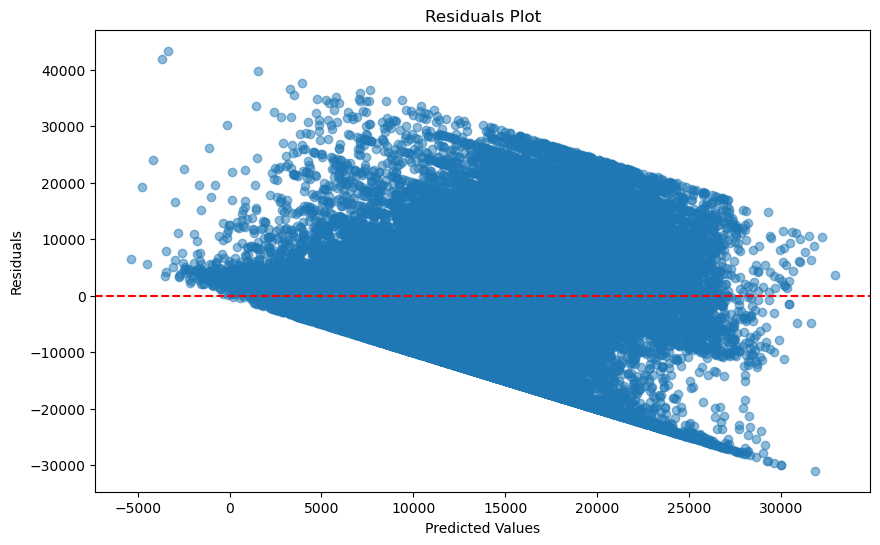

In [24]:

# Create a LinearRegression model
linreg = LinearRegression()

# Train the model on the training data
linreg.fit(X_train, y_train)

# Predict y from the test dataset
y_test_pred = linreg.predict(X_test)

# Predict y from the training dataset
y_train_pred = linreg.predict(X_train)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (Coefficient of Determination): {r2}")

# Calculate residuals
residuals = y_test - y_test_pred

# Create a DataFrame with residuals
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Residuals': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(residuals_df['Predicted'], residuals_df['Residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Model  - 2.  Encoded data with top co-related features - PCA + Linear regression

(138170, 15)
Y Test Mean Squared Error: 94843726.96636324
Y Train Mean Squared Error: 95212987.96033375
R-squared (Coefficient of Determination): 0.14852419805305872


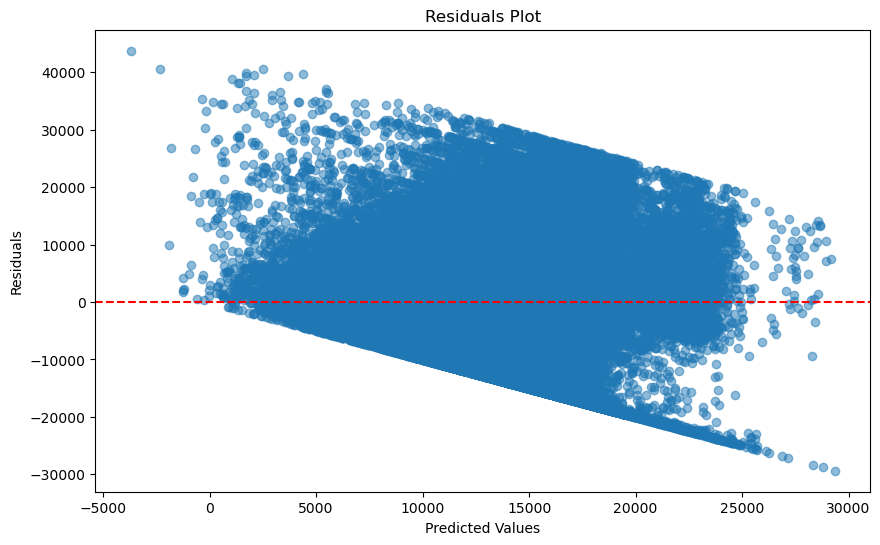

In [25]:

# Scale numerical features
numerical_columns = ['manu_jeep','manu_toyota','manu_ford','manu_na', 'manu_ram','size', 'fuel', 'year', 'cylinders', 'transmission', 'odometer','drive', 'type','condition', 'manu_chevrolet']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

print(X_train_scaled.shape)

# Perform PCA
pca = PCA(n_components=8)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a LinearRegression model
linreg = LinearRegression()

# Train the model on the training data with PCA-transformed features
linreg.fit(X_train_pca, y_train)

# Predict y from the test dataset with PCA-transformed features
y_test_pred = linreg.predict(X_test_pca)

# Predict y from the training dataset with PCA-transformed features
y_train_pred = linreg.predict(X_train_pca)


# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (Coefficient of Determination): {r2}")

# Calculate residuals
residuals = y_test - y_test_pred

# Create a DataFrame with residuals
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Residuals': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(residuals_df['Predicted'], residuals_df['Residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Model  - 3  Encoded data with top co-related features - Polynomial + Linear regression

Y Test Mean Squared Error: 66908511.58708064
Y Train Mean Squared Error: 67522502.62824917
R-squared (Coefficient of Determination): 0.3993173783555477


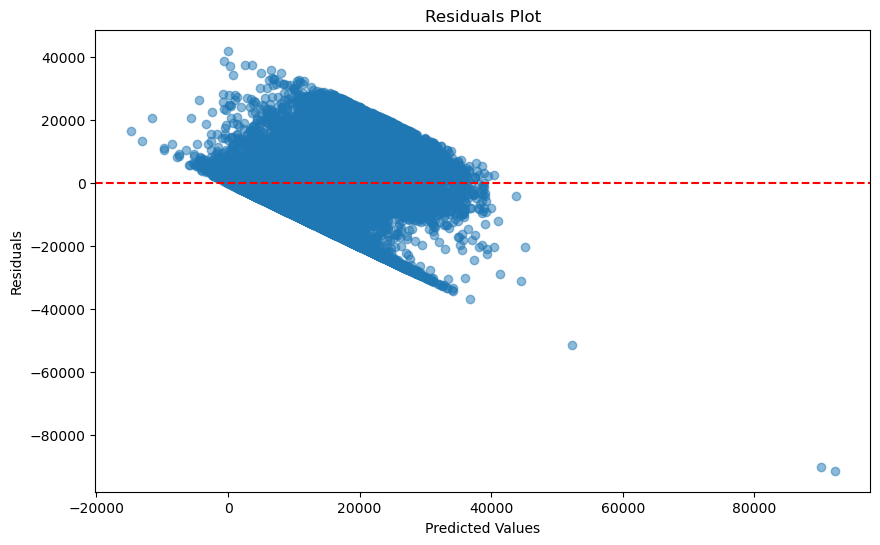

In [26]:
# Create a LinearRegression model
linreg = LinearRegression()

# Create PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree=3)  # You can change the degree as needed

# Transform your features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model on the training data
linreg.fit(X_train_poly, y_train)

# Predict y from the test dataset
y_test_pred = linreg.predict(X_test_poly)

# Predict y from the training dataset
y_train_pred = linreg.predict(X_train_poly)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (Coefficient of Determination): {r2}")

# Calculate residuals
residuals = y_test - y_test_pred

# Create a DataFrame with residuals
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Residuals': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(residuals_df['Predicted'], residuals_df['Residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model 1 - Evaluation

In [27]:

# Define the parameter grid for grid search
param_grid = {
    'linreg__fit_intercept': [True, False]
}

# Create a Pipeline for data processing with linear regression
pipe = Pipeline([
    ('linreg', LinearRegression())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train models using grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_pipe = grid_search.best_estimator_

# Predict y from the transformed test dataset using the best model
y_test_pred = best_pipe.predict(X_test)

# Predict y from the training dataset using the best model
y_train_pred = best_pipe.predict(X_train)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Best model Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Best model Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"Best model R-squared (Coefficient of Determination): {r2}")


Best model Y Test Mean Squared Error: 85554108.73343366
Best model Y Train Mean Squared Error: 86155304.63753816
Best model R-squared (Coefficient of Determination): 0.23192333669582754


### Model 2 - Evaluation

In [28]:
# Scale numerical features
numerical_columns = ['manu_jeep','manu_toyota','manu_ford','manu_na', 'manu_ram','size', 'fuel', 'year', 'cylinders', 'transmission', 'odometer','drive', 'type','condition', 'manu_chevrolet']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

print(X_train_scaled.shape)

# Perform PCA
pca = PCA(n_components=8)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Create a Pipeline for data processing with linear regression
pipe = Pipeline([
    ('linreg', LinearRegression())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train models using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best estimator from grid search
best_pipe = grid_search.best_estimator_

# Predict y from the transformed test dataset using the best model
y_test_pred = best_pipe.predict(X_test_pca)

# Predict y from the training dataset using the best model
y_train_pred = best_pipe.predict(X_train_pca)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Best model Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Best model Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"Best model R-squared (Coefficient of Determination): {r2}")


(138170, 15)
Best model Y Test Mean Squared Error: 94843726.96636324
Best model Y Train Mean Squared Error: 95212987.96033375
Best model R-squared (Coefficient of Determination): 0.14852419805305872


### Model 3 - Evaluation

In [29]:
# Create a LinearRegression model
linreg = LinearRegression()

# Create PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed

# Transform your features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Create a Pipeline for data processing with linear regression
pipe = Pipeline([
    ('linreg', LinearRegression())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train models using grid search
grid_search.fit(X_train_poly, y_train)

# Get the best estimator from grid search
best_pipe = grid_search.best_estimator_

# Predict y from the transformed test dataset using the best model
y_test_pred = best_pipe.predict(X_test_poly)

# Predict y from the training dataset using the best model
y_train_pred = best_pipe.predict(X_train_poly)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Best model Y Test Mean Squared Error:", mse_test)

# Calculate mean squared error for train data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Best model Y Train Mean Squared Error:", mse_train)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_test_pred)
print(f"Best model R-squared (Coefficient of Determination): {r2}")


Best model Y Test Mean Squared Error: 71762733.32594372
Best model Y Train Mean Squared Error: 72417025.11379156
Best model R-squared (Coefficient of Determination): 0.3557377713522022


### Cross validation on linear models

In [30]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds
n_folds = 5

# Create regression models
linear_reg_model = LinearRegression()

# Define the mean squared error as the scoring metric
scorer = make_scorer(mean_squared_error)

# Perform K-Fold Cross-Validation for Linear Regression
linear_reg_scores = cross_val_score(linear_reg_model, X, y, cv=n_folds, scoring=scorer)
linear_reg_mse = linear_reg_scores.mean()



# Print the mean squared error for each model
print("Linear Regression Cross validation X-Mean Squared Error:", linear_reg_mse)

Linear Regression Cross validation X-Mean Squared Error: 86798875.3741351


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Summary of Regression Model Evaluations

#### Default Linear Regression Model
    - Y Test Mean Squared Error: 85554108.73343366
    - Y Train Mean Squared Error: 86155304.63753816
    - R-squared (Coefficient of Determination): 0.23192333669582754  

#### Default Linear Regression Model with PCA
    - Y Test Mean Squared Error: 94843726.96636324
    - Y Train Mean Squared Error: 95212987.96033375
    - R-squared (Coefficient of Determination): 0.14852419805305872
  
#### Default Linear Regression Model with Polynomial features
    - Y Test Mean Squared Error: 71762733.32594372
    - Y Train Mean Squared Error:  72417025.11379156
    - R-squared (Coefficient of Determination): 0.3557377713522022
    
### Interpreting the Results:

    - The Default Linear Regression Model yielded an MSE of approximately 85.6 million on the test data, indicating its predictive accuracy. The model explains about 23.2% of the variance in car prices.

    - Introducing PCA slightly increased the MSE on the test data to nearly 94.8 million, indicating a slight decrease in prediction accuracy. The model's ability to explain price variance was reduced to about 14.9%.

    - The Linear Regression Model with Polynomial Features demonstrated better performance with an MSE of around 71.8 million on the test data. It explains approximately 35.6% of the variance in car prices.
    
### Next Steps:

Based on these findings, we recommend the following steps:

- Consider trying more models so coefficient of determination will be mire higher
- Consider expanding the dataset to include more examples, particularly for underrepresented vehicle segments. This could enhance prediction accuracy.
- Incorporate temporal factors, such as the month or year of sale, to account for market fluctuations in car prices.
- Establish a pipeline for periodic model updates and retraining using new sales data to ensure sustained accuracy.

https://www.kaggle.com/code/jominjae/used-car-price-prediction-lgb#LOAD-DATA-AND-EDA

https://www.kaggle.com/code/gcdatkin/used-car-price-prediction

https://github.com/abhashpanwar/used-car-price-prediction/blob/master/data-preprocessing.ipynb

https://github.com/panambY/Used_Car_Price/blob/master/Used_Car_Price.ipynb

https://rpubs.com/as4yed/Used-Cars-Data-Analysis